# Data Balancing economic

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
from pandas import DataFrame, Series
from matplotlib.pyplot import figure, show

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

print("project_dir: ", project_dir)
# Import the module
from utils.dslabs_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var
from utils.dslabs_functions import plot_bar_chart
from utils.pipeline import Pipeline, EvaluationEnum

dataloader = Pipeline(evaluation=EvaluationEnum.BALANCE)


data, target = dataloader.get_econmical_classification_dataset_and_target()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
project_dir:  /Users/matsalexander/Desktop/kdd-process/src


Minority class= 1 : 136
Majority class= 0 : 3536
Proportion: 0.04 : 1


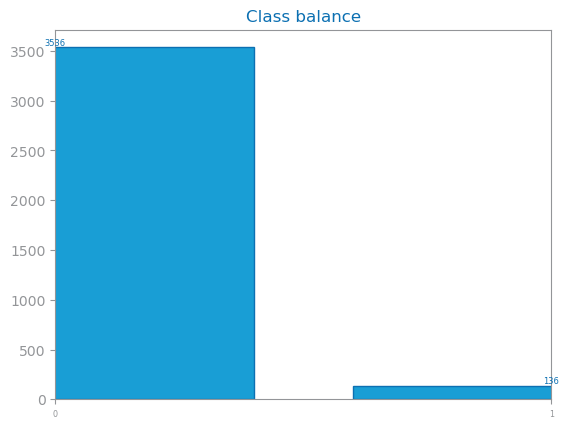

In [16]:
original: DataFrame = data.copy()

target_count: Series = original[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
show()

In [17]:

df_positives: Series = original[original[target] == positive_class]
df_negatives: Series = original[original[target] == negative_class]

In [18]:
from pandas import concat


df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
# df_under.to_csv(f"data/{file}_under.csv", index=False)

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

Minority class= 1 : 136
Majority class= 0 : 136
Proportion: 1.0 : 1


## Oversampling

In [19]:
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
# df_over.to_csv(f"data/{file}_over.csv", index=False)

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

Minority class= 1 : 3536
Majority class= 0 : 3536
Proportion: 1.0 : 1


## Smooth Oversampling

In [20]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = original.pop(target).values
X: ndarray = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [target]

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

Minority class= 1 : 3536
Majority class= 0 : 3536
Proportion: 1.0 : 1
(7072, 71)


## conclusion
We observed class imbalance. For arrests data (large dataset), we first increased size, then undersampled negatives to match positives, ensuring balanced classes. For the smaller economic dataset, we applied the SMOTE oversampling method, generating synthetic positives to achieve similar class proportions. Both approaches enhance fairness and improve model training performance, ensuring robust, unbiased predictions and better generalization.